In [1]:
from pathlib import Path
import warnings

import pandas as pd
from PyALE import ale
from sklearn.inspection import PartialDependenceDisplay

from config.config_modeling import CAT_COLS, TRAIN_SIZE, TEST_FROM_VAL, RANDOM_STATE
from src.explanation.global_.ale_explainer import ohe_ale
from src.explanation.global_.pdp_explainer import categorical_partial_dependence
from src.explanation.global_.utils import (
    get_underscore,
    ohe_filter,
)
from src.modeling.create_data_split import split_data
from src.utils.models_pkl import load_pickle

In [2]:
warnings.filterwarnings("ignore")

# Initializing all the necessary variables

In [3]:
IN_PATH = Path("../../data") / "data_plain.csv"
MODEL_PATH = Path("../../models") / "XGB.pkl"
NUM_COLS = [["Year"], ["Fail.Obey.Signals"], ["Speeding"], ["Obey.Police.Doc.Light"]]

In [4]:
data = pd.read_csv(IN_PATH)
model = load_pickle(MODEL_PATH)

In [5]:
ohe_data = split_data(
    cols=CAT_COLS,
    df=data,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
)

In [6]:
X_train = ohe_data["train"][0]
Y_train = ohe_data["train"][1]
X_test = ohe_data["test"][0]

In [7]:
cols = X_train.columns.values.tolist()
underscore = get_underscore(cols)
underscore_cols = underscore[0]
non_underscore_cols = underscore[1]
ohe_results = ohe_filter(non_underscore_cols, underscore_cols)
non_ohe = ohe_results[0]
ohe = ohe_results[1]
prefix_ohe = ohe_results[2]
for col in NUM_COLS: 
    non_ohe.remove(col)

# PDP

### Numerical variables

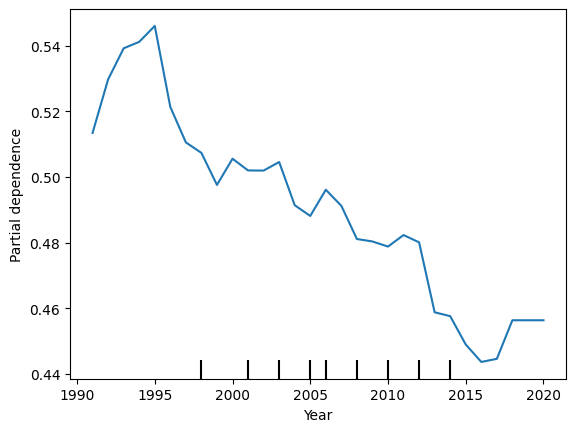

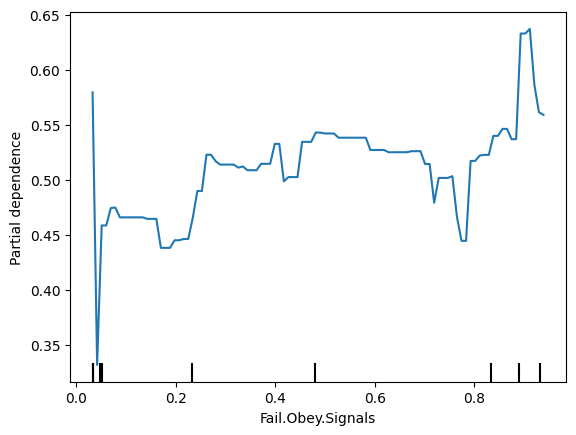

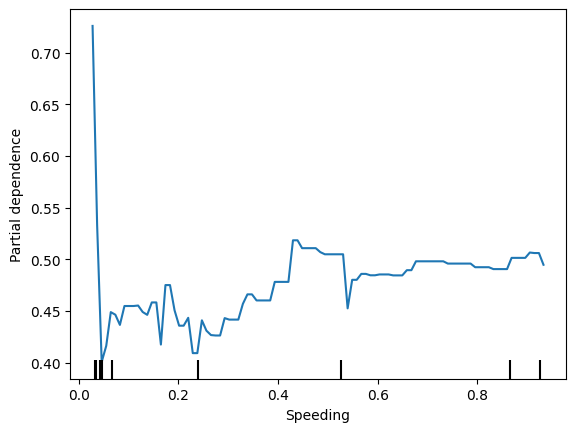

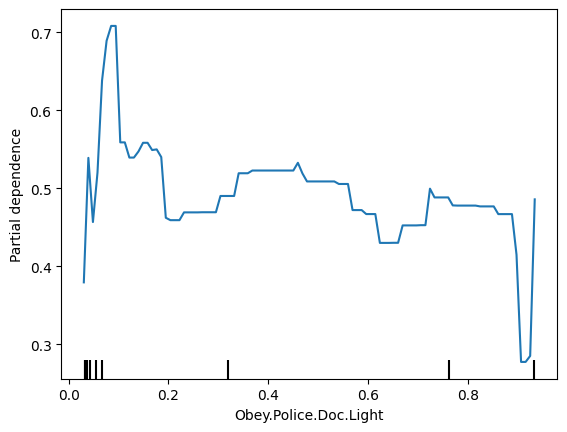

In [8]:
for col in NUM_COLS:
    PartialDependenceDisplay.from_estimator(model, X_test, features=col)

### Categorical, not one hot encoded variables 

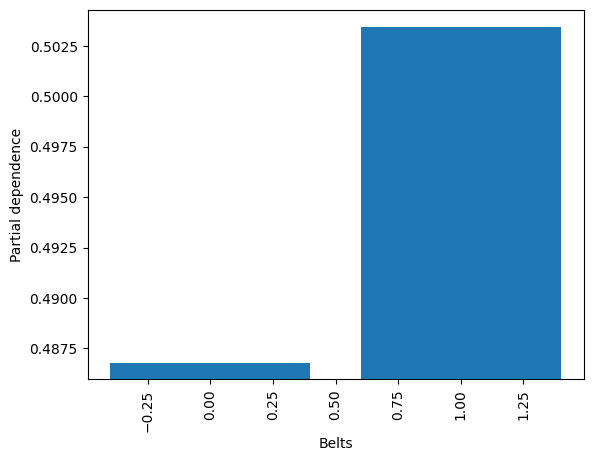

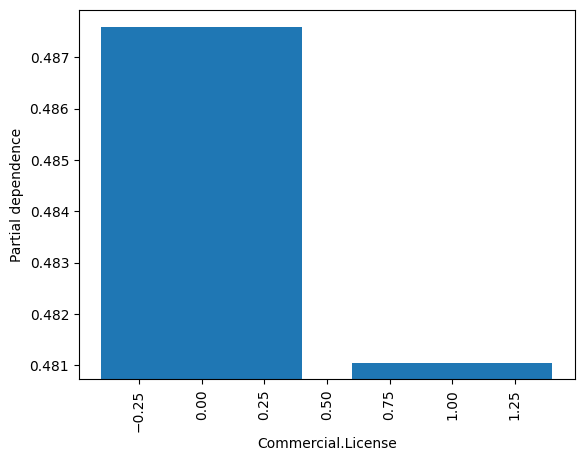

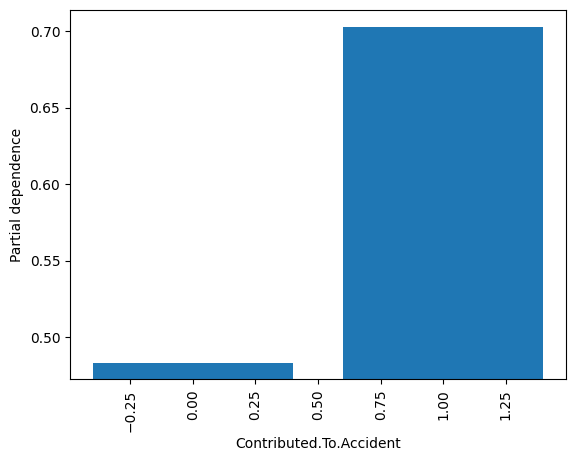

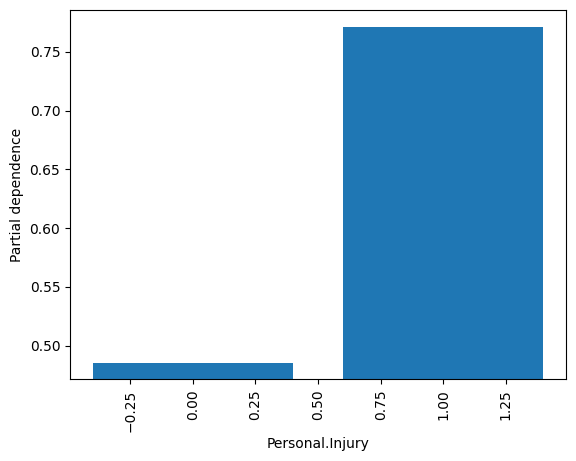

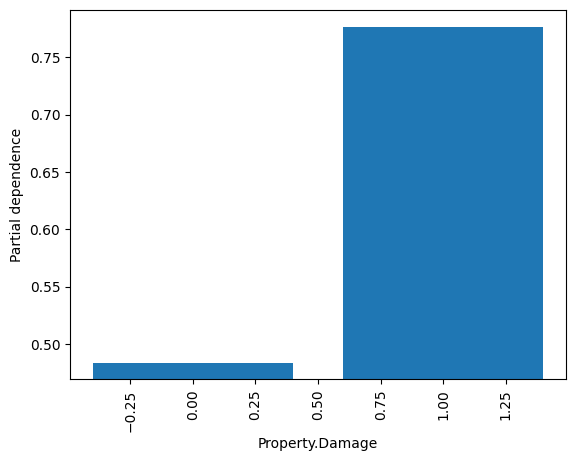

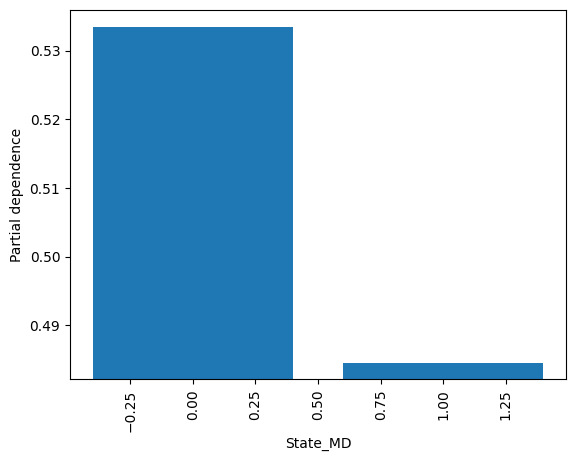

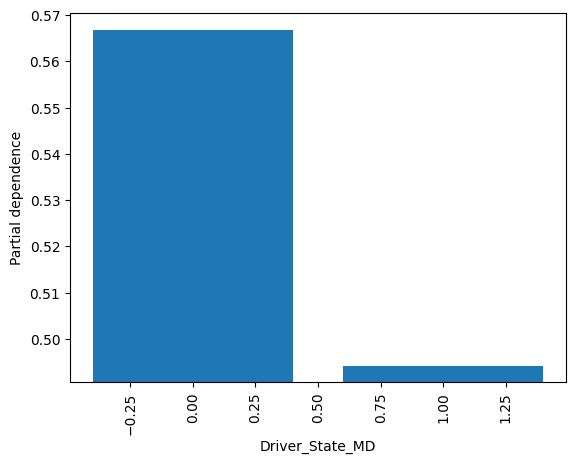

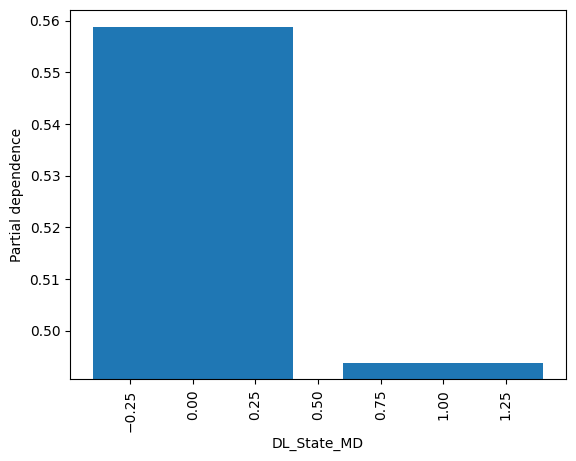

In [9]:
for col in non_ohe:
    PartialDependenceDisplay.from_estimator(model, X_test, features=col, categorical_features=col)

### One hot encoded variables

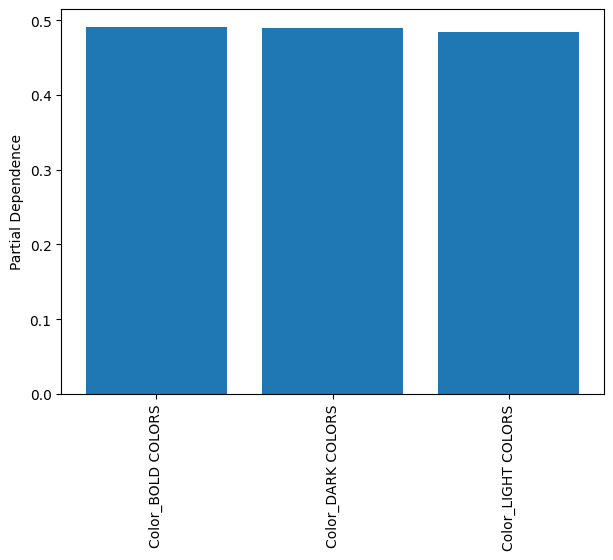

In [10]:
Color_PDP = categorical_partial_dependence(model, X_test, feature_names=ohe[0], figure_size=(7, 5))

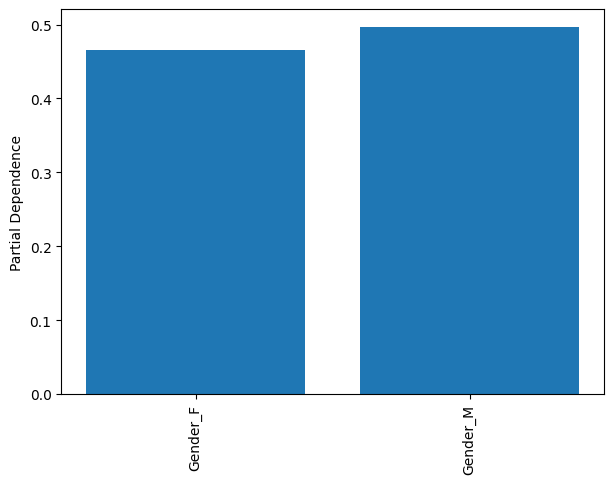

In [11]:
Gender_PDP = categorical_partial_dependence(model, X_test, feature_names=ohe[1], figure_size=(7, 5))

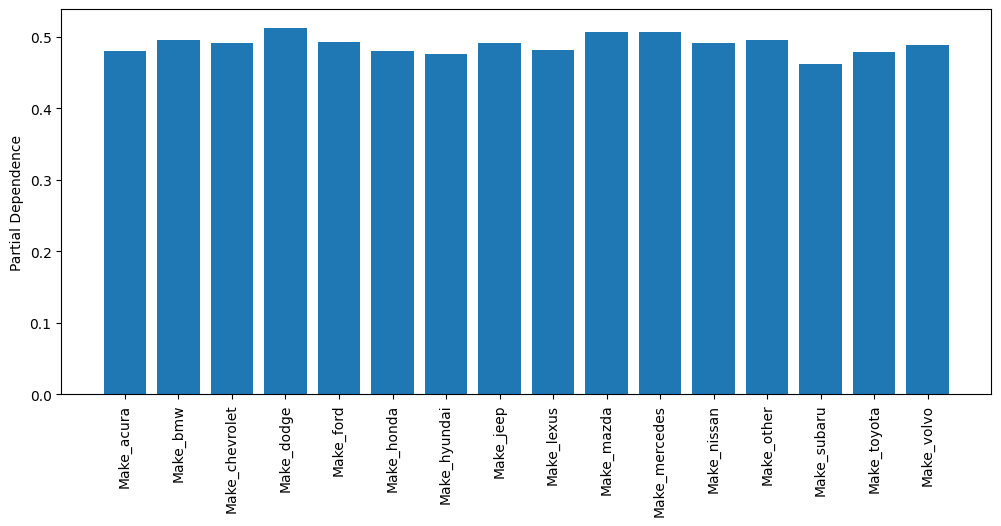

In [12]:
Make_PDP = categorical_partial_dependence(model, X_test, feature_names=ohe[2], figure_size=(12, 5))

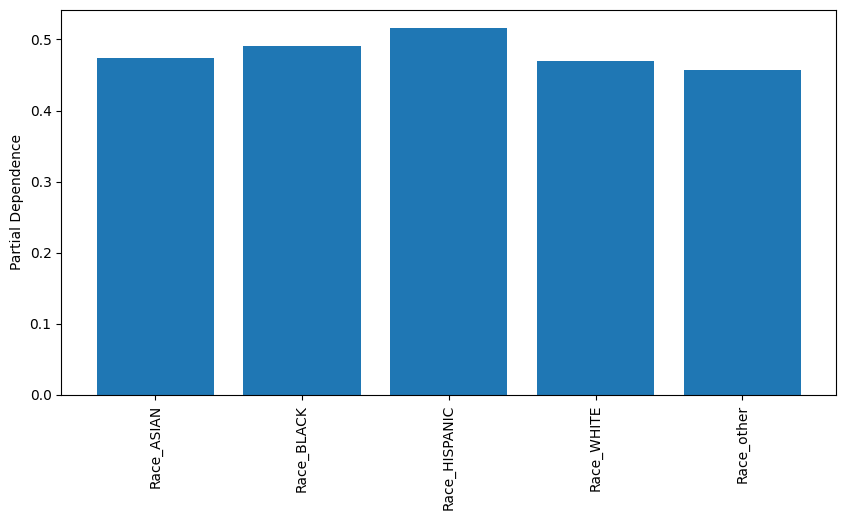

In [13]:
Race_PDP = categorical_partial_dependence(model, X_test, feature_names=ohe[3], figure_size=(10, 5))

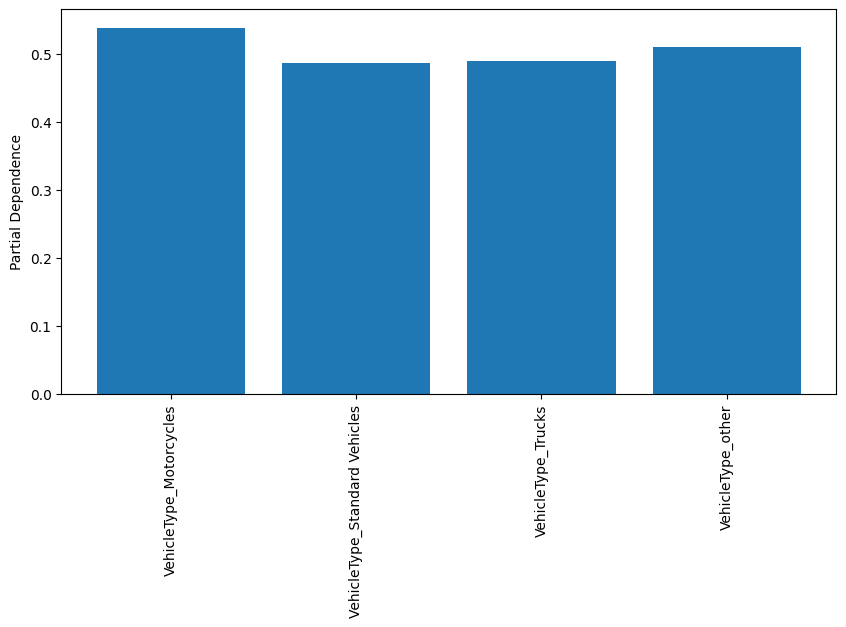

In [14]:
Vehicle_PDP = categorical_partial_dependence(
    model, X_test, feature_names=ohe[4], figure_size=(10, 5)
)

# PYALE

### Numerical variables

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


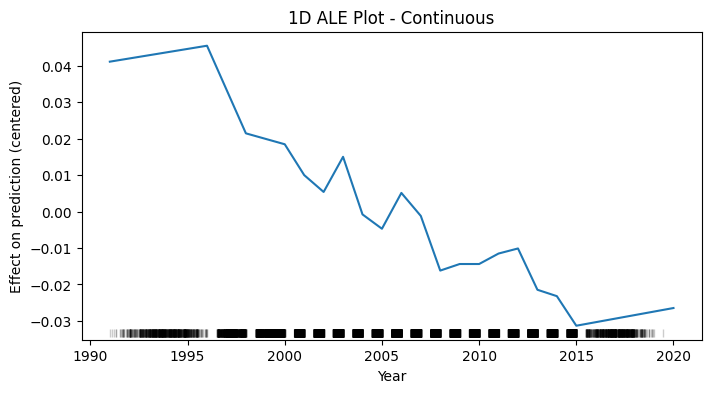

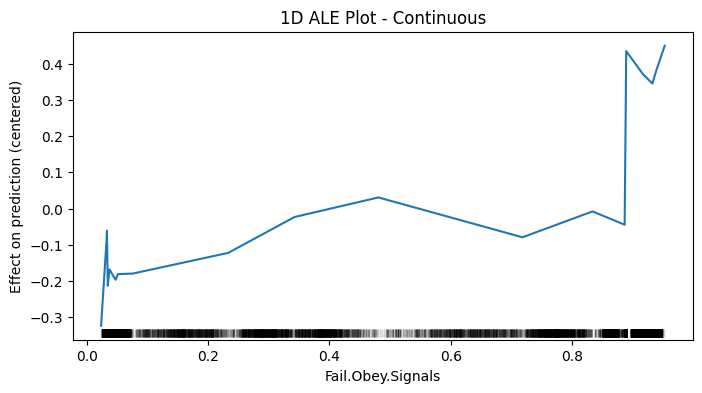

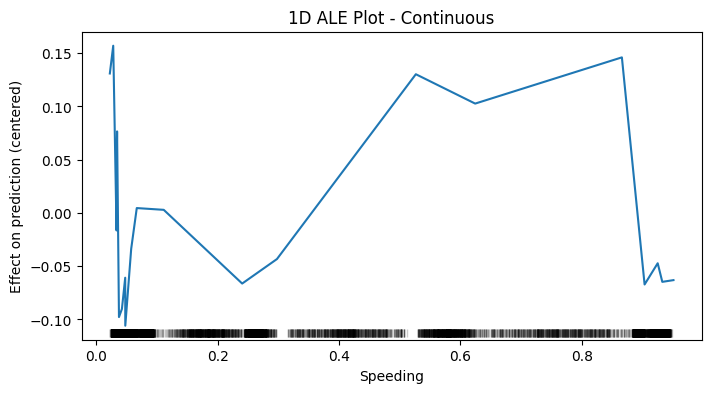

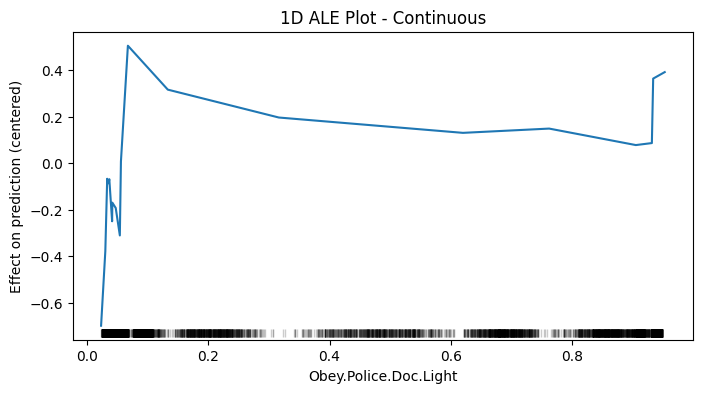

In [15]:
for col in NUM_COLS:
    ale(X=X_test, model=model, feature=col, include_CI=False)

### Categorical, not one hot encoded variables

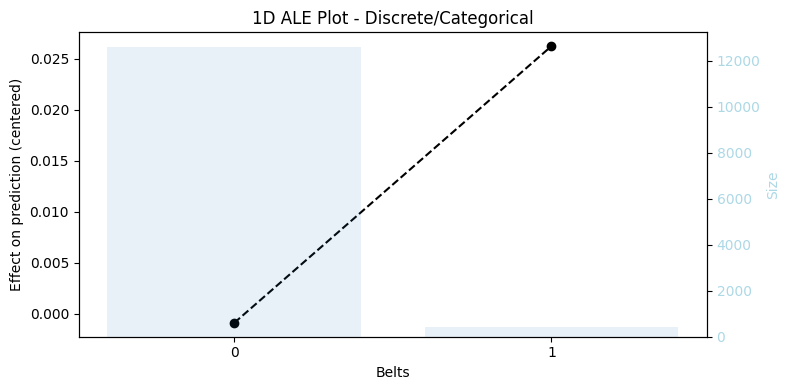

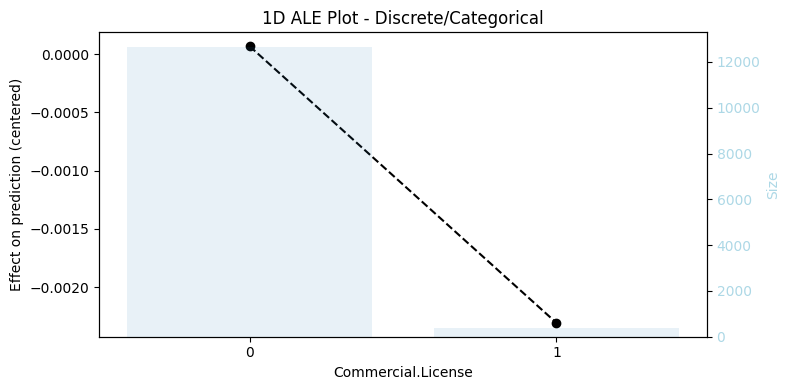

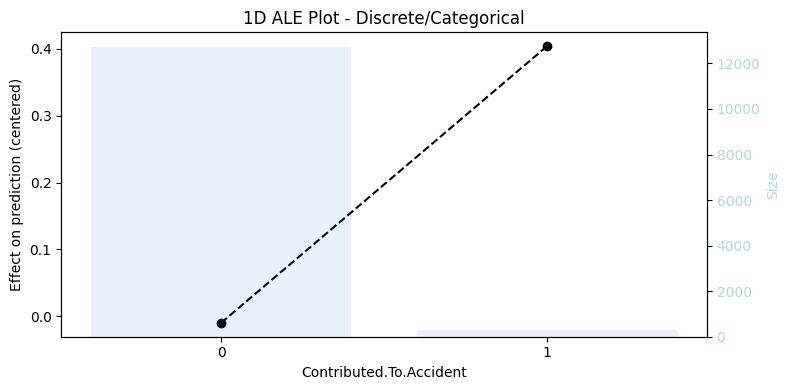

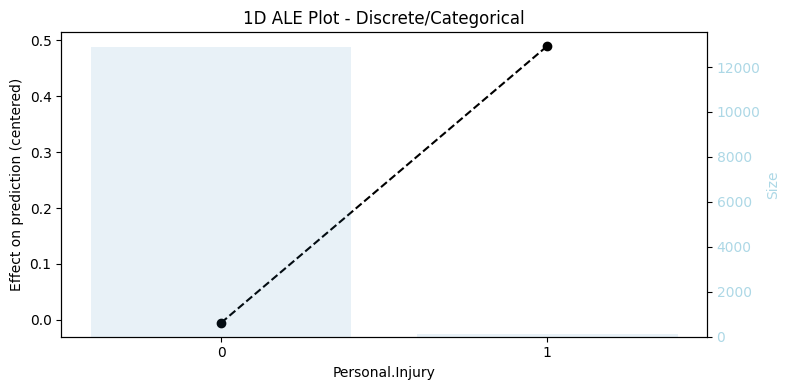

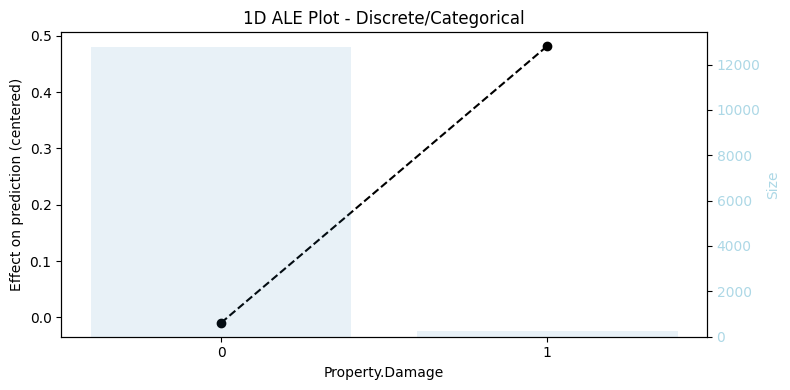

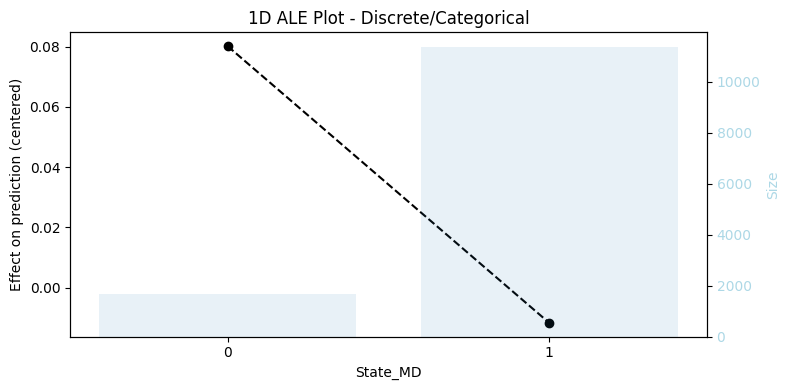

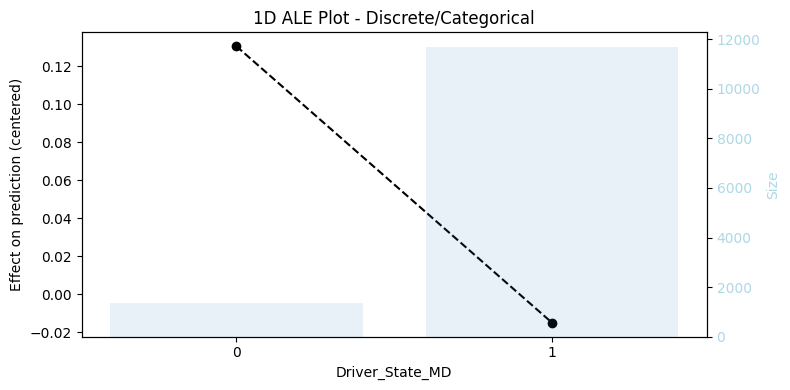

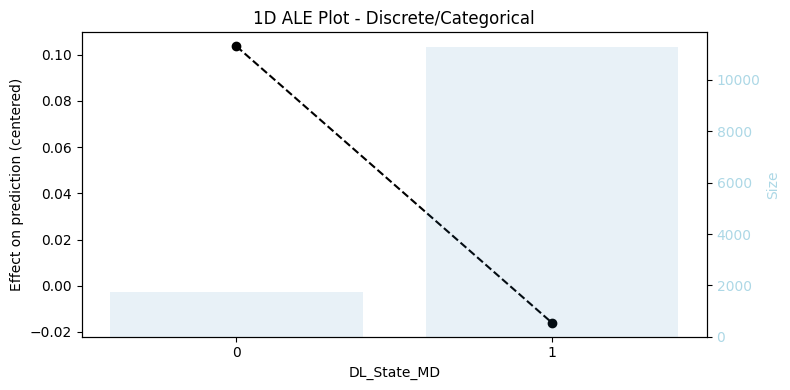

In [16]:
for col in non_ohe:
    ale(
        X=X_test,
        model=model,
        feature=col,
        feature_type="discrete",
        include_CI=False,
    )

### One hot encoded variables

PyALE._ALE_generic:INFO: categorical feature detected.


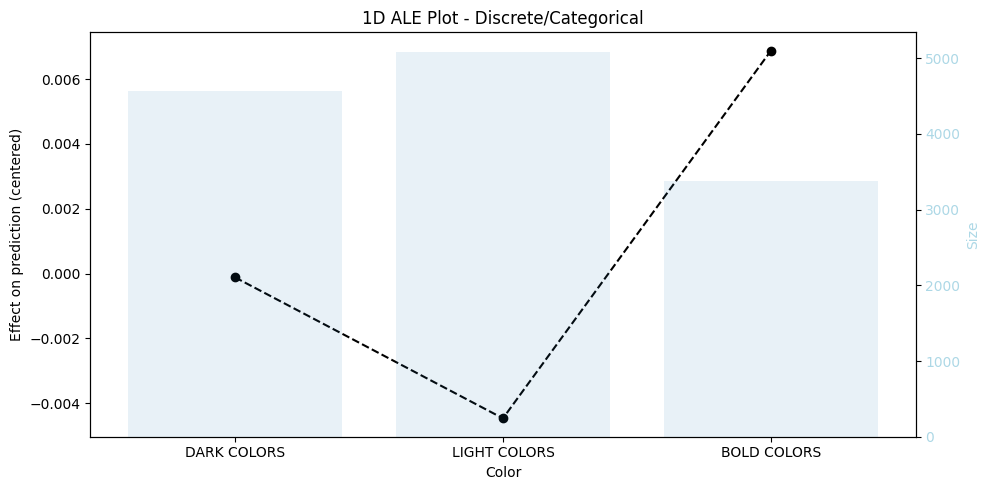

In [17]:
Color_ALE = ohe_ale(
    prefix_ohe[0],
    cat_cols=CAT_COLS,
    model_cols=cols,
    df=data,
    model=model,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
    figure_size=(10, 5),
)

PyALE._ALE_generic:INFO: categorical feature detected.


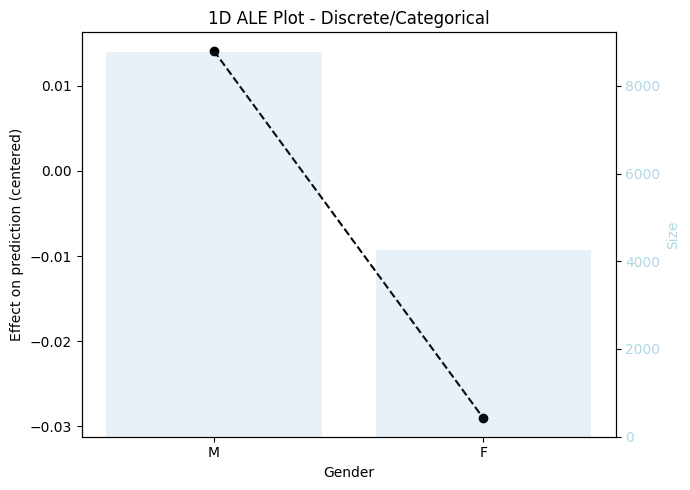

In [18]:
Gender_ALE = ohe_ale(
    prefix_ohe[1],
    cat_cols=CAT_COLS,
    model_cols=cols,
    df=data,
    model=model,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
    figure_size=(7, 5),
)

PyALE._ALE_generic:INFO: categorical feature detected.


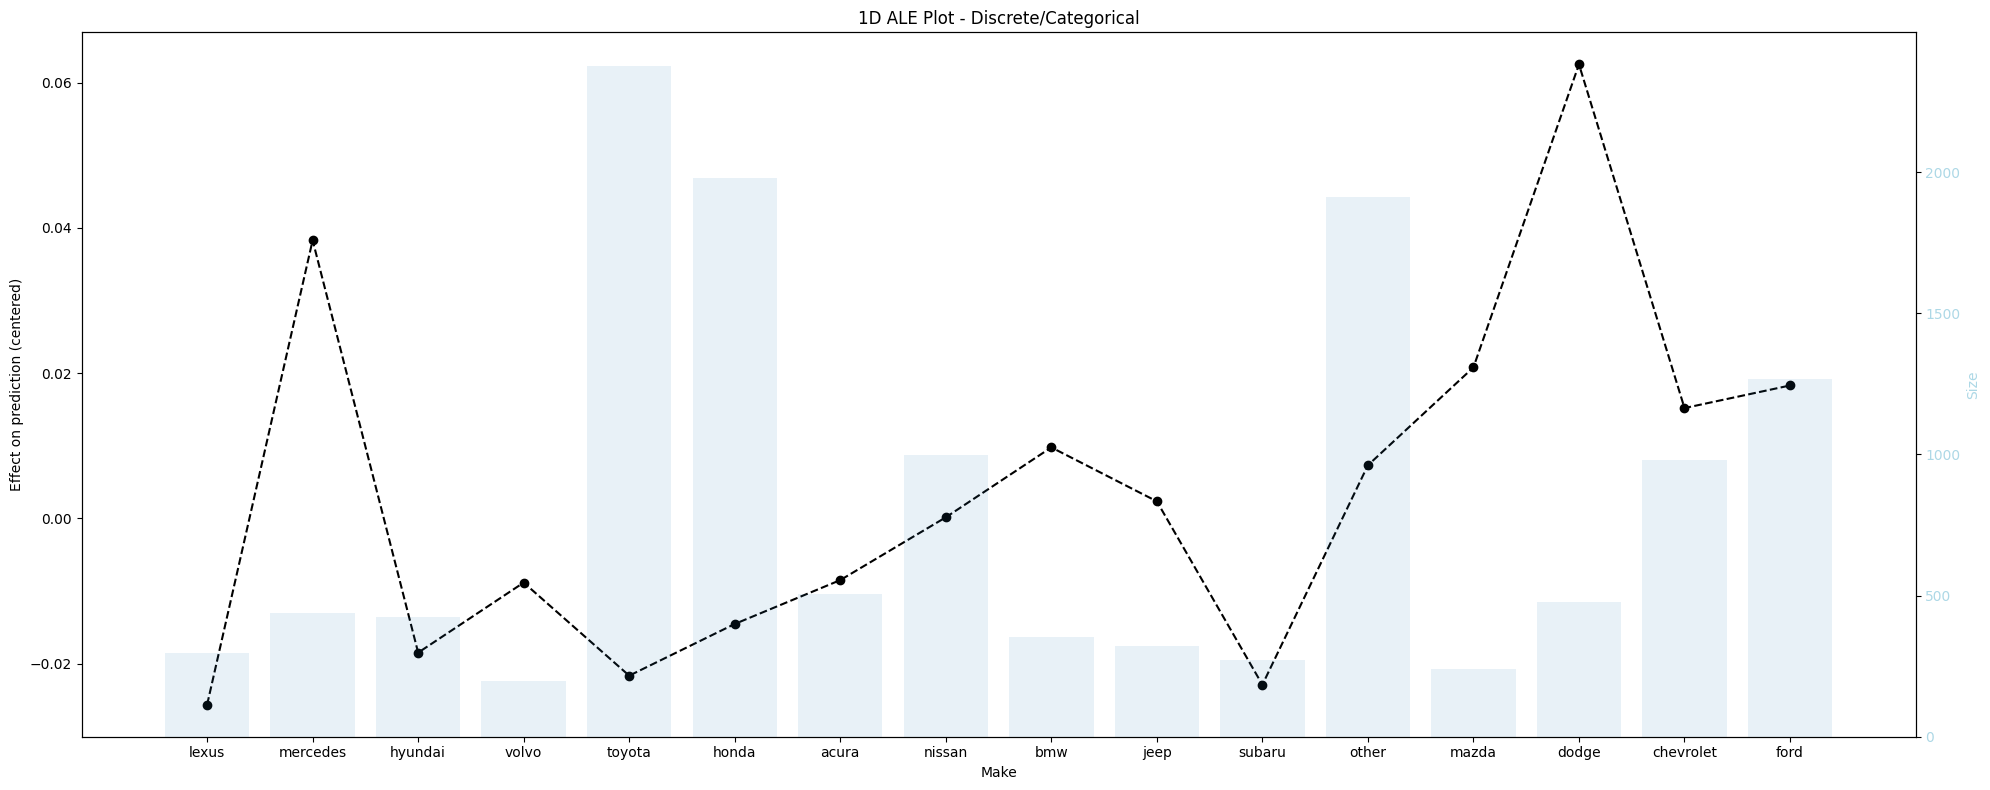

In [19]:
Make_ALE = ohe_ale(
    prefix_ohe[2],
    cat_cols=CAT_COLS,
    model_cols=cols,
    df=data,
    model=model,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
    figure_size=(20, 8),
)

PyALE._ALE_generic:INFO: categorical feature detected.


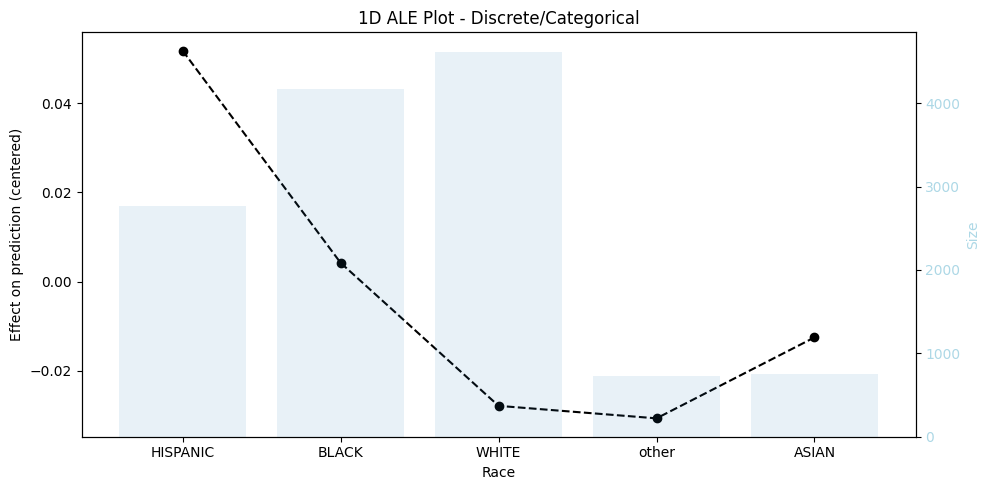

In [20]:
Race_ALE = ohe_ale(
    prefix_ohe[3],
    cat_cols=CAT_COLS,
    model_cols=cols,
    df=data,
    model=model,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
    figure_size=(10, 5),
)

PyALE._ALE_generic:INFO: categorical feature detected.


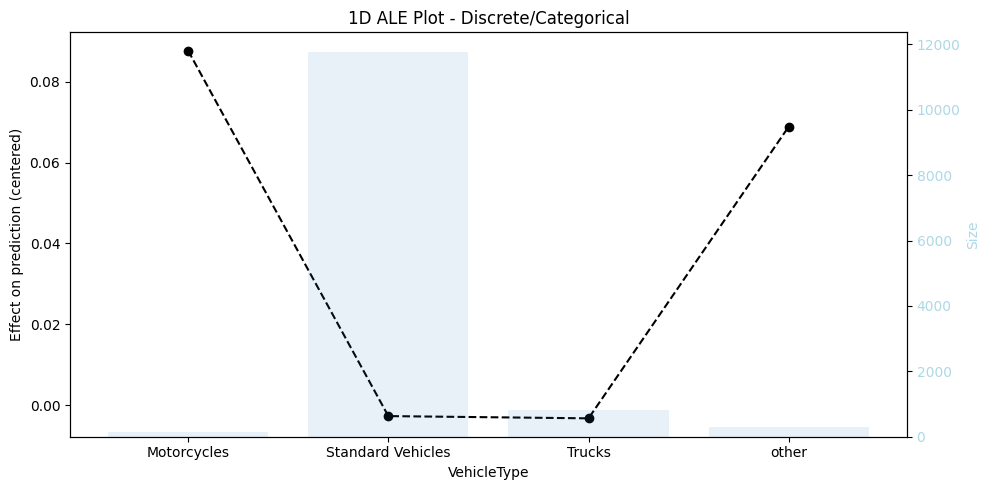

In [21]:
VehicleType_ALE = ohe_ale(
    prefix_ohe[4],
    cat_cols=CAT_COLS,
    model_cols=cols,
    df=data,
    model=model,
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
    figure_size=(10, 5),
)